In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
pd.set_option('display.max_columns', 500)

In [2]:
data = pd.read_csv('AnalystDataset.csv')
data

,player_id,Hand,Height,Weight,FB_velo,Var_1,Var_2,Var_3,Var_4,Var_5,Var_6,Var_7,Var_8,Var_9,Var_10,Var_11,Var_12,Var_13,Var_14,Var_15,Var_16,Var_17,Var_18,Var_19,Var_20,Var_21,Var_22,Var_23,Var_24,Var_25,Var_26,Var_27,Var_28,Var_29,Var_30,Var_31,Var_32,Var_33,Var_34,Var_35,Var_36,Var_37,Var_38,Var_39,Var_40,Var_41,Var_42,Var_43,Var_44,Var_45,Var_46,Var_47,Var_48,Var_49,Var_50,Var_51,Var_52,Var_53,Var_54,Var_55,Var_56,Var_57,Var_58,Var_59,Var_60,Var_61,Var_62,Var_63,Var_64,Var_65,Var_66,Var_67,Var_68,Var_69,Var_70,Var_71,Var_72,Var_73,Var_74,Var_75,Var_76,Var_77,Var_78,Var_79,Var_80,Var_81,Var_82,Var_83,Var_84,Var_85,Var_86,Var_87,Var_88,Var_89,Var_90,Var_91,Var_92,Var_93,Var_94,Var_95,Var_96,Var_97,Var_98,Var_99,Var_100,Var_101,Var_102,Var_103,Var_104,Var_105,Var_106,Var_107,Var_108,Var_109,Var_110,Var_111,Var_112,Var_113,Var_114,Var_115,Var_116,Var_117,Var_118,Var_119,Var_120,Var_121,Var_122,Var_123,Var_124,Var_125,Var_126,Var_127,Var_128,Var_129,Var_130,Var_131,Var_132,Var_133,Var_134,Var_135,Var_136,Var_137,Var_138,Var_139,Var_140,Var_141,Var_142,Var_143,Var_144,Var_145,Var_146,Var_147,Var_148,Var_149,Var_150,Var_151,Var_152,Var_153,Var_154,Var_155,Var_156,Var_157,Var_158,Var_159,Var_160,Var_161,Var_162,Var_163,Var_164,Var_165,Var_166,Var_167,Var_168,Var_169,Var_170,Var_171,Var_172,Var_173,Var_174,Var_175,Var_176,Var_177,Var_178,Var_179,Var_180,Var_181,Var_182,Var_183,Var_184,Var_185,Var_186,Var_187,Var_188,Var_189,Var_190,Var_191,Var_192,Var_193,Var_194,Var_195,Var_196,Var_197,Var_198,Var_199,Var_200,Var_201,Var_202,Var_203,Var_204,Var_205,Var_206,Var_207,Var_208,Var_209,Var_210,Var_211,Var_212,Var_213,Var_214,Var_215,Var_216,Var_217,Var_218,Var_219,Var_220,Var_221,Var_222,Var_223,Var_224,Var_225,Var_226,Var_227,Var_228
0,476,R,79,230,86.21085,60.661279,59.391315,44.422491,43.642518,22.716024,22.590960,22.236456,12.327304,500.520230,421.789810,-778.166373,-316.852073,330.576478,242.101478,1.751398,147.572605,645.511408,945.267424,460.532827,1035.797349,2074.785645,162.279126,14.846736,42.376543,36.004777,-0.888073,-15.053821,0.047429,586.215671,1.467175,120.300025,11632.624100,35428.93574,14995.36676,40480.17274,66.969664,56.922076,60.739147,76.884996,6.446433,11.966312,5.359619,5.155577,8.636484,4.951887,1.659009,0.733615,43.888474,46.159233,52.942273,1.634485,12.519142,23.093486,-5.718471,5.500318,4.535490,-5.332912,-11.609253,-12.792667,-16.175274,23.241624,15.476942,-36.859117,-35.987569,105.182674,41.199354,56.652354,46.692439,36.318296,14.695547,1.506293,0.524191,1.610962,0.754269,1331.449224,1100.875886,15.179326,17.188669,35.585012,47.816888,19.746672,56.780269,29.272531,49.683026,-4.485455,59.363906,31.589261,2.230977,10.540076,46.972611,-78.354641,-45.862239,-17.637890,-55.875513,278.575298,1980.185688,-466.679098,403.353782,2005.632650,224.246940,-369.780011,-104.812195,-623.566449,2084.732170,885.120195,288.400997,1631.694924,1808.513998,-234.820188,-53.284629,344.811391,577.904238,462.331293,407.897296,241.759978,386.888376,216.262156,410.260346,404.726842,432.001767,415.239913,306.306827,244.268018,146.992720,566.007949,435.180573,305.186206,807.065889,1010.292873,550.881049,3.657112,5.631948,4.420208,33.102897,53.518825,33.790780,37.639978,29.619551,40.915034,28.853853,-26.118194,-13.825067,14.302420,71.757755,79.679538,-24.648782,-23.349091,-21.712183,72.542444,95.118217,6.337961,18.542877,13.804240,24.451028,39.674214,14.406819,15.491990,-2.659718,35.671500,46.970272,9.785449,40.172979,6.612948,-3.453255,22.178049,5.322597,1.827847,-7.980538,-2.381771,60.263093,26.638996,18.874495,144.989743,119.061759,100.314130,37.094541,-14.283921,16.206174,-11.558211,108.131372,110.097034,123.118532,-9.317913,3.156590,0.899528,87.325864,43.119841,36.047442,-14.030257,-6.078395,-1.386496,-1.803744,-5.697972,9.382460,0.273131,4.977475,16.220677,18.508185,1.049638,60.005022,4.512041,0.706773,59.710144,4.737142,0.627715,58.702313,3.891563,0.682492,57.551135,3.601702,0.743923,56.345664,3.379597,0.146822,0.368499,0.144857,59

Things to note - 
- Var_214, Var_215, Var_216 have 26 NaN values
- Unique pitchers
- Majority right-handed pitchers (don't think metrics are evened out for handedness)
- 436 highly correlated (>0.6) variable pairs 

In [3]:
data.isna().sum()[data.isna().sum().values>0].index

Index(['Var_214', 'Var_215', 'Var_216'], dtype='object')

In [4]:
data = data.dropna(axis=1)

In [5]:
data['player_id'].value_counts()

476      1
21652    1
14753    1
17259    1
16005    1
        ..
9121     1
5732     1
5651     1
11480    1
37684    1
Name: player_id, Length: 711, dtype: int64

In [6]:
data['Hand'].value_counts()

R    515
L    196
Name: Hand, dtype: int64

In [7]:
data['one_hot_hand'] = pd.get_dummies(data['Hand'],drop_first=True,dtype=float)
data = data.drop(columns='Hand')
data['one_hot_hand'].value_counts()

1.0    515
0.0    196
Name: one_hot_hand, dtype: int64

In [8]:
data[data['one_hot_hand']==1.0]['FB_velo'].describe()

count    515.000000
mean      93.645265
std        2.318508
min       82.114120
25%       92.396685
50%       93.780260
75%       95.067605
max      101.170400
Name: FB_velo, dtype: float64

In [9]:
data[data['one_hot_hand']==0.0]['FB_velo'].describe()

count    196.000000
mean      91.952105
std        2.442655
min       86.106330
25%       90.226385
50%       92.012890
75%       93.740420
max       98.948690
Name: FB_velo, dtype: float64

In [10]:
data.describe()

,player_id,Height,Weight,FB_velo,Var_1,Var_2,Var_3,Var_4,Var_5,Var_6,Var_7,Var_8,Var_9,Var_10,Var_11,Var_12,Var_13,Var_14,Var_15,Var_16,Var_17,Var_18,Var_19,Var_20,Var_21,Var_22,Var_23,Var_24,Var_25,Var_26,Var_27,Var_28,Var_29,Var_30,Var_31,Var_32,Var_33,Var_34,Var_35,Var_36,Var_37,Var_38,Var_39,Var_40,Var_41,Var_42,Var_43,Var_44,Var_45,Var_46,Var_47,Var_48,Var_49,Var_50,Var_51,Var_52,Var_53,Var_54,Var_55,Var_56,Var_57,Var_58,Var_59,Var_60,Var_61,Var_62,Var_63,Var_64,Var_65,Var_66,Var_67,Var_68,Var_69,Var_70,Var_71,Var_72,Var_73,Var_74,Var_75,Var_76,Var_77,Var_78,Var_79,Var_80,Var_81,Var_82,Var_83,Var_84,Var_85,Var_86,Var_87,Var_88,Var_89,Var_90,Var_91,Var_92,Var_93,Var_94,Var_95,Var_96,Var_97,Var_98,Var_99,Var_100,Var_101,Var_102,Var_103,Var_104,Var_105,Var_106,Var_107,Var_108,Var_109,Var_110,Var_111,Var_112,Var_113,Var_114,Var_115,Var_116,Var_117,Var_118,Var_119,Var_120,Var_121,Var_122,Var_123,Var_124,Var_125,Var_126,Var_127,Var_128,Var_129,Var_130,Var_131,Var_132,Var_133,Var_134,Var_135,Var_136,Var_137,Var_138,Var_139,Var_140,Var_141,Var_142,Var_143,Var_144,Var_145,Var_146,Var_147,Var_148,Var_149,Var_150,Var_151,Var_152,Var_153,Var_154,Var_155,Var_156,Var_157,Var_158,Var_159,Var_160,Var_161,Var_162,Var_163,Var_164,Var_165,Var_166,Var_167,Var_168,Var_169,Var_170,Var_171,Var_172,Var_173,Var_174,Var_175,Var_176,Var_177,Var_178,Var_179,Var_180,Var_181,Var_182,Var_183,Var_184,Var_185,Var_186,Var_187,Var_188,Var_189,Var_190,Var_191,Var_192,Var_193,Var_194,Var_195,Var_196,Var_197,Var_198,Var_199,Var_200,Var_201,Var_202,Var_203,Var_204,Var_205,Var_206,Var_207,Var_208,Var_209,Var_210,Var_211,Var_212,Var_213,Var_217,Var_218,Var_219,Var_220,Var_221,Var_222,Var_223,Var_224,Var_225,Var_226,Var_227,Var_228,one_hot_hand
count,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,7

In [11]:
def high_corr_pairs(df, threshold=0.8):
    """
    Identify pairs of variables in a DataFrame that have a correlation coefficient above a specified threshold.
    
    Parameters:
    - df (DataFrame): The input data.
    - threshold (float, optional): The correlation coefficient threshold. Defaults to 0.8.
    
    Returns:
    - list of tuples: Pairs of column names with high correlation.
    """
    corr_matrix = df.corr().abs()

    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    
    pairs = []
    for column in to_drop:
        above_threshold_vars = upper.index[upper[column] > threshold].tolist()
        for atv in above_threshold_vars:
            pairs.append((column, atv,upper[column][atv]))

    return pairs

'''var_corrs = high_corr_pairs(data, threshold=0.6)
var_corrs.sort(key = lambda x: x[2], reverse=True)
print("number of correlated variables pairs ---->",len(var_corrs))
var_corrs'''

'var_corrs = high_corr_pairs(data, threshold=0.6)\nvar_corrs.sort(key = lambda x: x[2], reverse=True)\nprint("number of correlated variables pairs ---->",len(var_corrs))\nvar_corrs'

In [12]:
def get_top_corr(var,k):
    velo_corr = data.corr()[data.corr().index==var].to_dict(orient='index')[var]
    top_corr_keys = sorted(velo_corr, reverse=True, key=lambda dict_key: abs(velo_corr[dict_key]))[1:k+1]
    top_corr = []
    for k in top_corr_keys:
        top_corr.append((k, velo_corr[k]))
    return top_corr

get_top_corr('FB_velo',15)

[('Var_86', 0.31520941800416064),
 ('one_hot_hand', 0.3064622794836521),
 ('Var_70', 0.2958426095317417),
 ('Var_193', 0.2906515915865174),
 ('Var_19', 0.28743191514920713),
 ('Var_108', 0.2810211966039593),
 ('Var_126', 0.2804315867704414),
 ('Var_128', 0.27913467627120186),
 ('Var_125', 0.2748374620625987),
 ('Var_107', 0.2737157107367882),
 ('Var_87', -0.2724570279033696),
 ('Var_116', 0.26651274095260635),
 ('Var_179', 0.25646507194662255),
 ('Var_153', -0.2552382179120404),
 ('Var_105', 0.25513072944237397)]

In [13]:
velo_corr = get_top_corr('FB_velo',15)
var_velo_corr = [c[0] for c in velo_corr]
for c in velo_corr:
    print("\033[1m For Variable--->",c,'\033[0m')
    nest_corr = get_top_corr(c[0],10)
    var_nest_corr = [i[0] for i in nest_corr]
    common = list(set(var_velo_corr).intersection(var_nest_corr))
    dict_nest_corr = dict(nest_corr)
    print({c:dict_nest_corr[c] for c in common})
    print()

 For Variable---> ('Var_86', 0.31520941800416064) 
{'Var_19': 0.7751853612396912, 'Var_70': 0.8634647550222325, 'Var_153': -0.828322271393621}

 For Variable---> ('one_hot_hand', 0.3064622794836521) 
{}

 For Variable---> ('Var_70', 0.2958426095317417) 
{'Var_86': 0.8634647550222325, 'Var_153': -0.7496882305973188}

 For Variable---> ('Var_193', 0.2906515915865174) 
{'Var_179': 0.5950745389075205, 'Var_86': 0.6321572470222139, 'Var_70': 0.6944217061629004, 'Var_19': 0.5704058958766496}

 For Variable---> ('Var_19', 0.28743191514920713) 
{'Var_126': 0.7339042200160056, 'Var_153': -0.7200217069277475, 'Var_179': 0.7196456335047471, 'Var_86': 0.7751853612396912, 'Var_70': 0.7168120833439207, 'Var_125': 0.7273398287110836, 'Var_105': 0.7172493100875231}

 For Variable---> ('Var_108', 0.2810211966039593) 
{'Var_126': 0.7959960001717343, 'Var_107': 0.8898019562883476, 'Var_125': 0.8279224175798653, 'Var_128': 0.8468697394036705, 'Var_105': 0.8189973416342959}

 For Variable---> ('Var_126', 0

##### Variables to be removed (when abs correlation >0.7)
- Var_70
- Var_19
- Var_126
- Var_128
- Var_125
- Var_107
- Var_153
- Var_105
- Var_117

##### Variables selected
- Var_86
- one_hot_hand
- Var_193
- Var_108
- Var_87
- Var_116
- Var_179

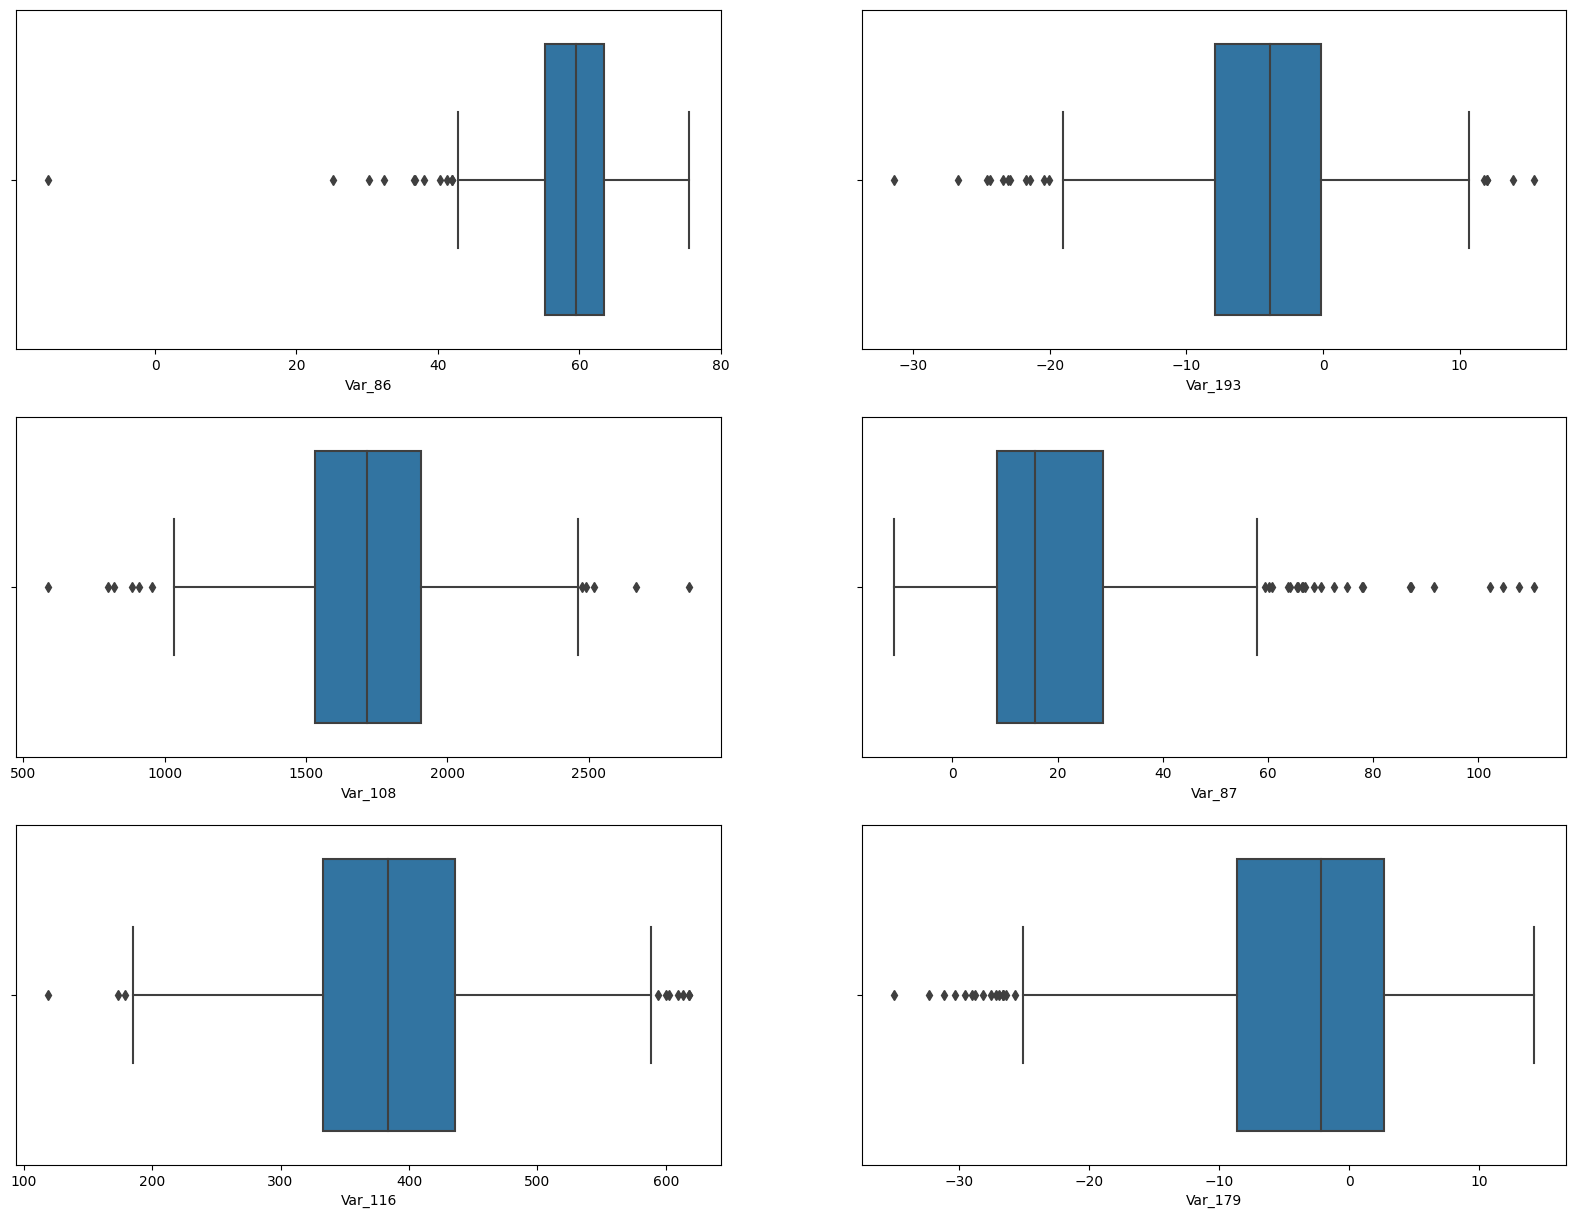

In [14]:
fig_var, ax_var = plt.subplots(3,2,figsize=(20,15))
sns.boxplot(data, x="Var_86", ax=ax_var[0][0])
sns.boxplot(data, x="Var_193", ax=ax_var[0][1])
sns.boxplot(data, x="Var_108", ax=ax_var[1][0])
sns.boxplot(data, x="Var_87", ax=ax_var[1][1])
sns.boxplot(data, x="Var_116", ax=ax_var[2][0])
sns.boxplot(data, x="Var_179", ax=ax_var[2][1])
plt.show()

In [15]:
data = data.drop(data['Var_86'].idxmin()).reset_index(drop=True)

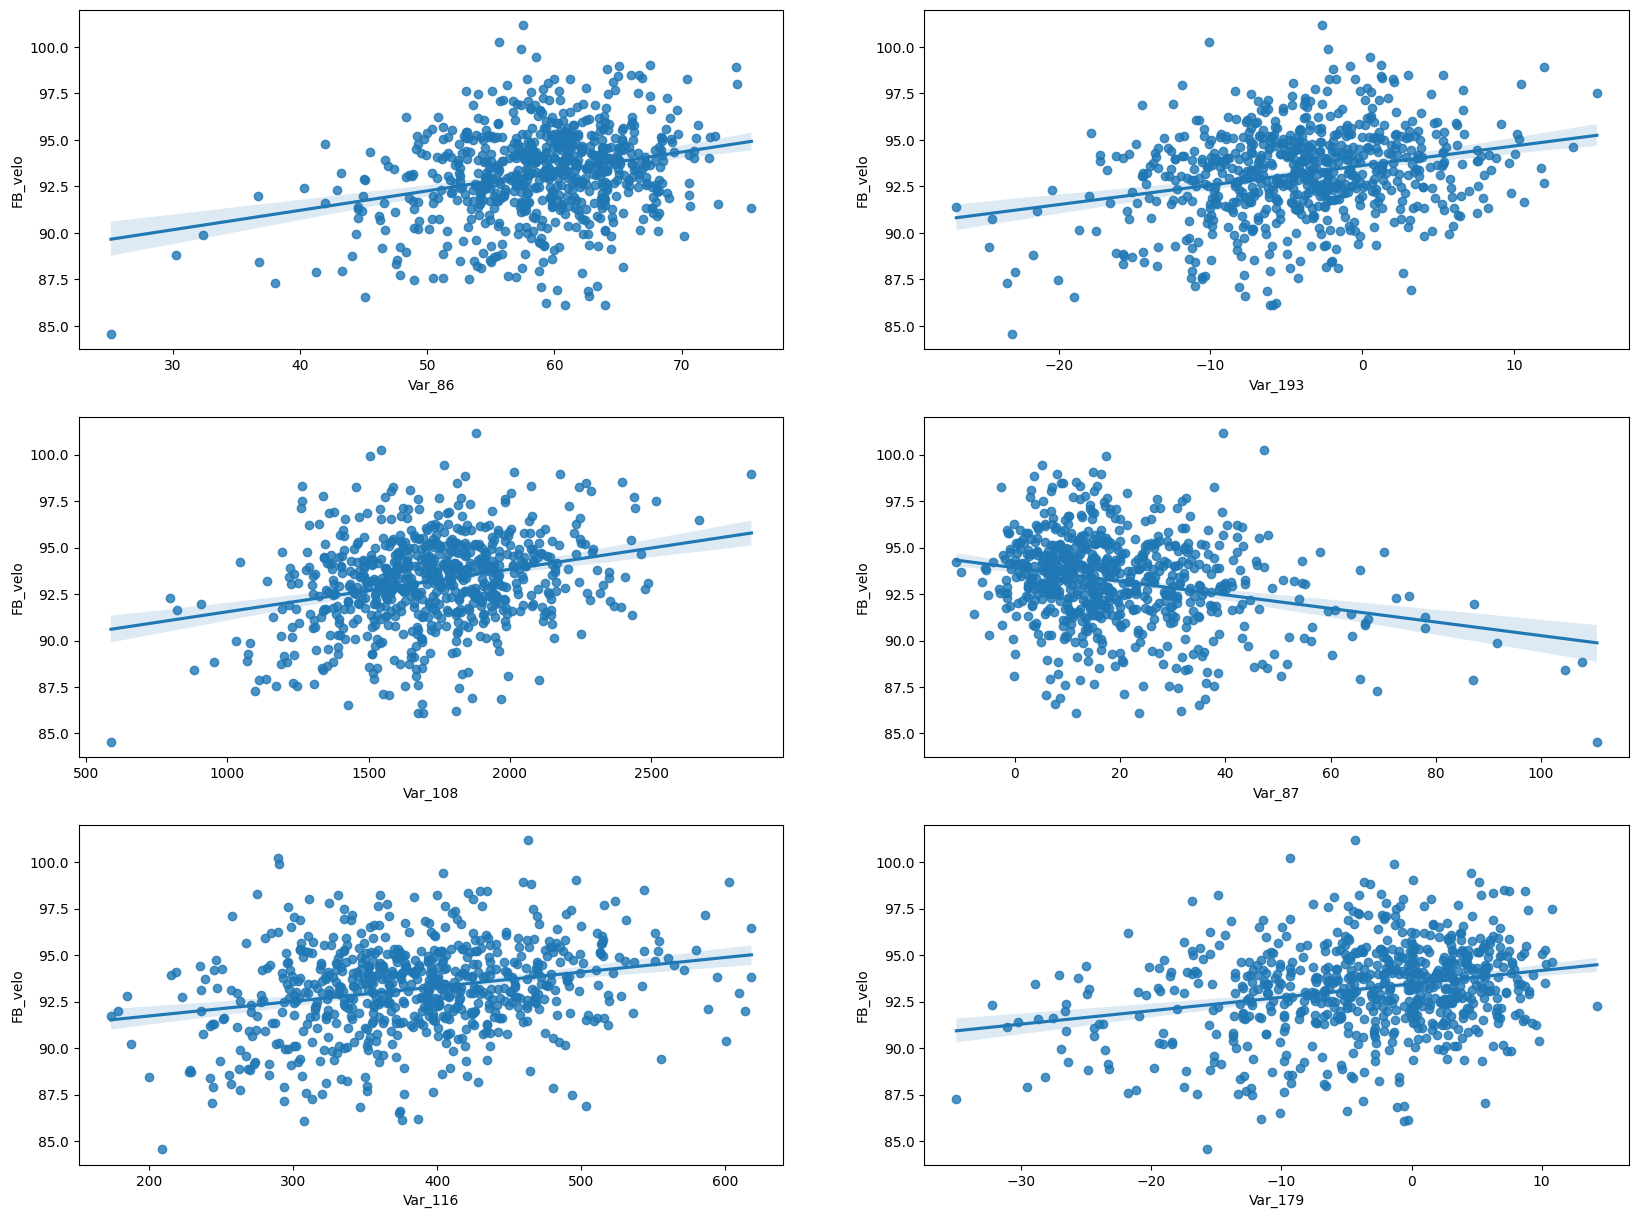

In [16]:
fig_corr, ax_corr = plt.subplots(3,2,figsize=(20,15))
sns.regplot(data, y="FB_velo", x="Var_86", ax=ax_corr[0][0])
sns.regplot(data, y="FB_velo", x="Var_193", ax=ax_corr[0][1])
sns.regplot(data, y="FB_velo", x="Var_108", ax=ax_corr[1][0])
sns.regplot(data, y="FB_velo", x="Var_87", ax=ax_corr[1][1])
sns.regplot(data, y="FB_velo", x="Var_116", ax=ax_corr[2][0])
sns.regplot(data, y="FB_velo", x="Var_179", ax=ax_corr[2][1])
plt.show()

In [17]:
X = data.loc[:,['one_hot_hand','Var_86','Var_193','Var_108','Var_87','Var_116','Var_179']]
y = data.loc[:,['FB_velo']].values
X.describe()

,one_hot_hand,Var_86,Var_193,Var_108,Var_87,Var_116,Var_179
count,710.000000,710.000000,710.000000,710.000000,710.000000,710.000000,710.000000
mean,0.723944,58.956122,-4.069242,1721.814201,19.774017,385.874175,-3.648333
std,0.447360,6.398699,6.289595,291.828202,16.636371,77.617293,8.447437
min,0.000000,25.141555,-26.752489,589.471429,-11.107127,173.531515,-34.990696
25%,0.000000,55.119697,-7.867772,1532.053866,8.398803,333.295423,-8.570511
50%,1.000000,59.490989,-3.880460,1717.817264,15.724470,384.142580,-2.120518
75%,1.000000,63.424701,-0.114538,1905.317117,28.582368,435.739091,2.732706
max,1.000000,75.484674,15.481295,2853.752973,110.625019,618.065185,14.246666


  File "c:\users\siddh\appdata\local\programs\python\python38\lib\site-packages\joblib\externals\loky\backend\context.py", line 251, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\users\siddh\appdata\local\programs\python\python38\lib\subprocess.py", line 489, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\users\siddh\appdata\local\programs\python\python38\lib\subprocess.py", line 854, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\users\siddh\appdata\local\programs\python\python38\lib\subprocess.py", line 1307, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


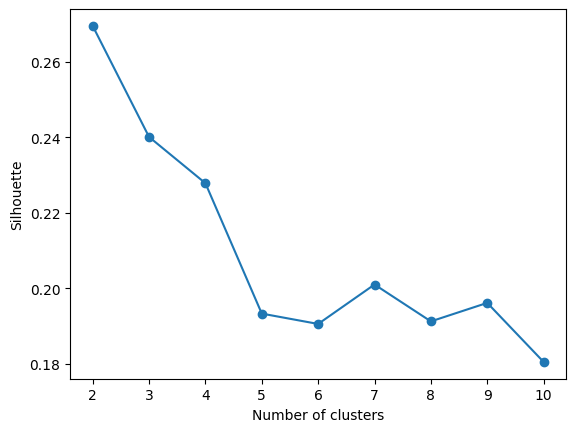

,player_id,Height,Weight,FB_velo,Var_1,Var_2,Var_3,Var_4,Var_5,Var_6,Var_7,Var_8,Var_9,Var_10,Var_11,Var_12,Var_13,Var_14,Var_15,Var_16,Var_17,Var_18,Var_19,Var_20,Var_21,Var_22,Var_23,Var_24,Var_25,Var_26,Var_27,Var_28,Var_29,Var_30,Var_31,Var_32,Var_33,Var_34,Var_35,Var_36,Var_37,Var_38,Var_39,Var_40,Var_41,Var_42,Var_43,Var_44,Var_45,Var_46,Var_47,Var_48,Var_49,Var_50,Var_51,Var_52,Var_53,Var_54,Var_55,Var_56,Var_57,Var_58,Var_59,Var_60,Var_61,Var_62,Var_63,Var_64,Var_65,Var_66,Var_67,Var_68,Var_69,Var_70,Var_71,Var_72,Var_73,Var_74,Var_75,Var_76,Var_77,Var_78,Var_79,Var_80,Var_81,Var_82,Var_83,Var_84,Var_85,Var_86,Var_87,Var_88,Var_89,Var_90,Var_91,Var_92,Var_93,Var_94,Var_95,Var_96,Var_97,Var_98,Var_99,Var_100,Var_101,Var_102,Var_103,Var_104,Var_105,Var_106,Var_107,Var_108,Var_109,Var_110,Var_111,Var_112,Var_113,Var_114,Var_115,Var_116,Var_117,Var_118,Var_119,Var_120,Var_121,Var_122,Var_123,Var_124,Var_125,Var_126,Var_127,Var_128,Var_129,Var_130,Var_131,Var_132,Var_133,Var_134,Var_135,Var_136,Var_137,Var_138,Var_139,Var_140,Var_141,Var_142,Var_143,Var_144,Var_145,Var_146,Var_147,Var_148,Var_149,Var_150,Var_151,Var_152,Var_153,Var_154,Var_155,Var_156,Var_157,Var_158,Var_159,Var_160,Var_161,Var_162,Var_163,Var_164,Var_165,Var_166,Var_167,Var_168,Var_169,Var_170,Var_171,Var_172,Var_173,Var_174,Var_175,Var_176,Var_177,Var_178,Var_179,Var_180,Var_181,Var_182,Var_183,Var_184,Var_185,Var_186,Var_187,Var_188,Var_189,Var_190,Var_191,Var_192,Var_193,Var_194,Var_195,Var_196,Var_197,Var_198,Var_199,Var_200,Var_201,Var_202,Var_203,Var_204,Var_205,Var_206,Var_207,Var_208,Var_209,Var_210,Var_211,Var_212,Var_213,Var_217,Var_218,Var_219,Var_220,Var_221,Var_222,Var_223,Var_224,Var_225,Var_226,Var_227,Var_228,one_hot_hand,cluster
0,476,79,230,86.21085,60.661279,59.391315,44.422491,43.642518,22.716024,22.590960,22.236456,12.327304,500.520230,421.789810,-778.166373,-316.852073,330.576478,242.101478,1.751398,147.572605,645.511408,945.267424,460.532827,1035.797349,2074.785645,162.279126,14.846736,42.376543,36.004777,-0.888073,-15.053821,0.047429,586.215671,1.467175,120.300025,11632.624100,35428.93574,14995.36676,40480.17274,66.969664,56.922076,60.739147,76.884996,6.446433,11.966312,5.359619,5.155577,8.636484,4.951887,1.659009,0.733615,43.888474,46.159233,52.942273,1.634485,12.519142,23.093486,-5.718471,5.500318,4.535490,-5.332912,-11.609253,-12.792667,-16.175274,23.241624,15.476942,-36.859117,-35.987569,105.182674,41.199354,56.652354,46.692439,36.318296,14.695547,1.506293,0.524191,1.610962,0.754269,1331.449224,1100.875886,15.179326,17.188669,35.585012,47.816888,19.746672,56.780269,29.272531,49.683026,-4.485455,59.363906,31.589261,2.230977,10.540076,46.972611,-78.354641,-45.862239,-17.637890,-55.875513,278.575298,1980.185688,-466.679098,403.353782,2005.632650,224.246940,-369.780011,-104.812195,-623.566449,2084.732170,885.120195,288.400997,1631.694924,1808.513998,-234.820188,-53.284629,344.811391,577.904238,462.331293,407.897296,241.759978,386.888376,216.262156,410.260346,404.726842,432.001767,415.239913,306.306827,244.268018,146.992720,566.007949,435.180573,305.186206,807.065889,1010.292873,550.881049,3.657112,5.631948,4.420208,33.102897,53.518825,33.790780,37.639978,29.619551,40.915034,28.853853,-26.118194,-13.825067,14.302420,71.757755,79.679538,-24.648782,-23.349091,-21.712183,72.542444,95.118217,6.337961,18.542877,13.804240,24.451028,39.674214,14.406819,15.491990,-2.659718,35.671500,46.970272,9.785449,40.172979,6.612948,-3.453255,22.178049,5.322597,1.827847,-7.980538,-2.381771,60.263093,26.638996,18.874495,144.989743,119.061759,100.314130,37.094541,-14.283921,16.206174,-11.558211,108.131372,110.097034,123.118532,-9.317913,3.156590,0.899528,87.325864,43.119841,36.047442,-14.030257,-6.078395,-1.386496,-1.803744,-5.697972,9.382460,0.273131,4.977475,16.220677,18.508185,1.049638,60.005022,4.512041,0.706773,59.710144,4.737142,0.627715,58.702313,3.891563,0.682492,57.551135,3.601702,0.743923,56.345664,3.379597,59.889753,0.523182,0.243799,0.324076,0.

In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow method to determine optimal K
distortions = []
sil = []
for i in range(2, 11):
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X_scaled)
    labels = km.labels_
    sil.append(silhouette_score(X_scaled, labels, metric = 'euclidean'))
    distortions.append(km.inertia_)

plt.plot(range(2, 11), sil, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette')
plt.show()

km = KMeans(n_clusters=2, random_state=0)
data['cluster'] = km.fit_predict(X_scaled)
data

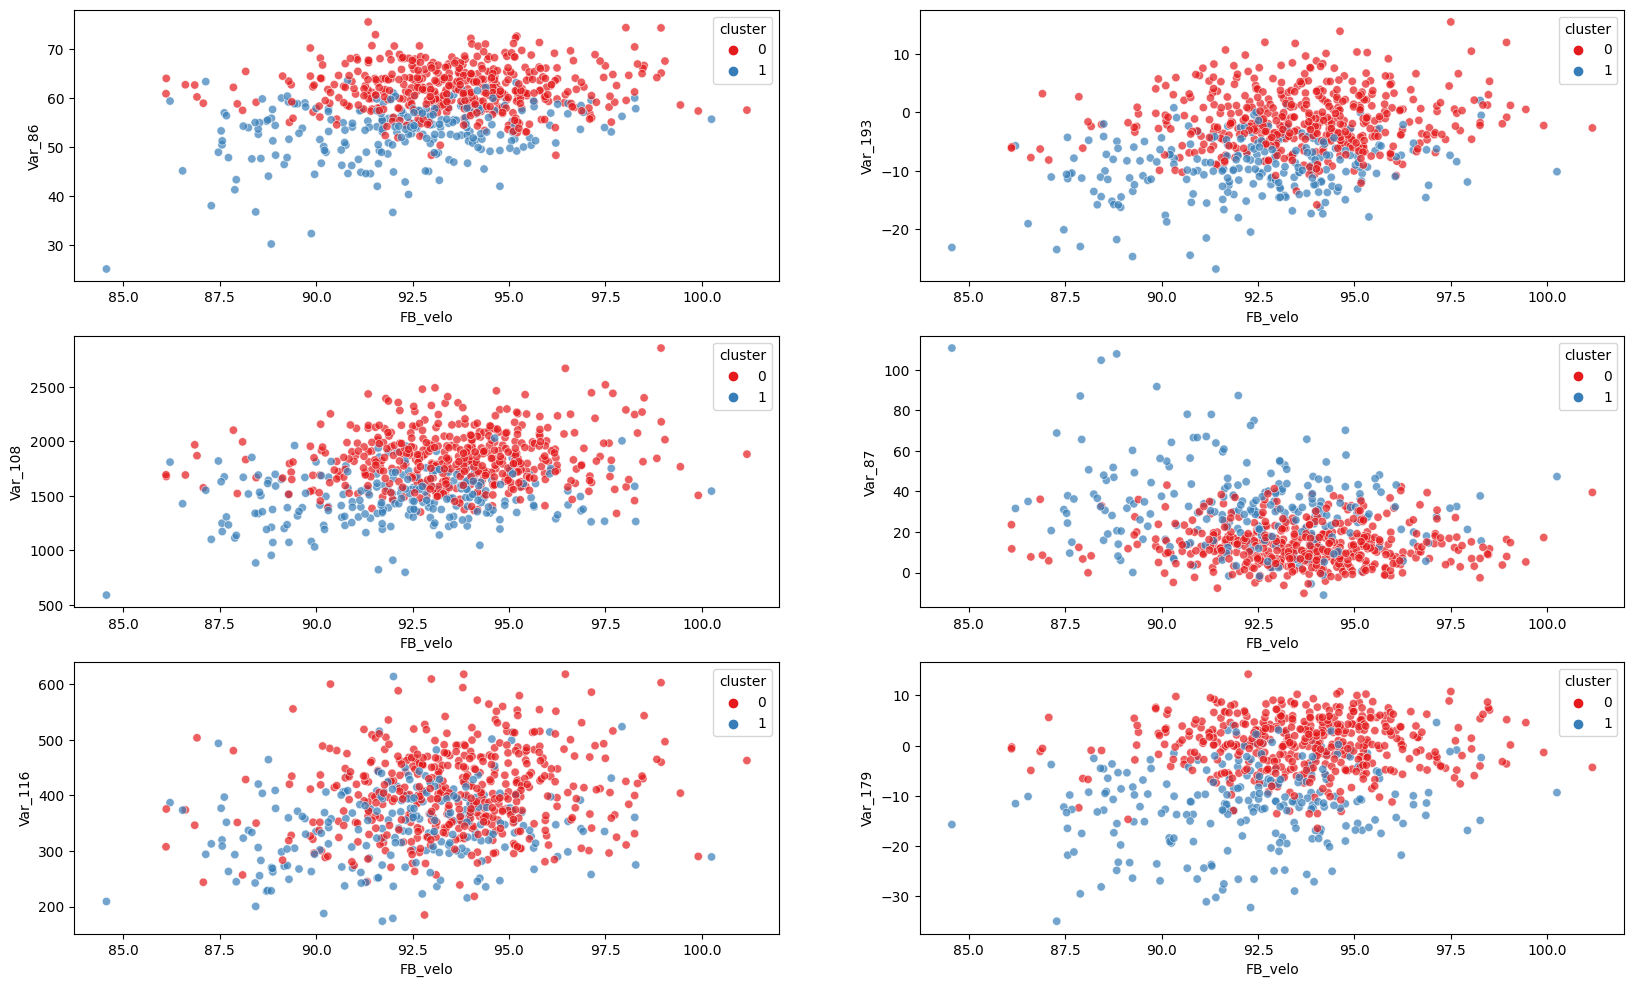

In [19]:
fig_cluster, ax_cluster = plt.subplots(3,2, figsize=(20, 12))
sns.scatterplot(data=data, y='Var_86', x='FB_velo', hue='cluster', palette='Set1', alpha=0.7, ax=ax_cluster[0][0])
sns.scatterplot(data=data, y='Var_193', x='FB_velo', hue='cluster', palette='Set1', alpha=0.7, ax=ax_cluster[0][1])
sns.scatterplot(data=data, y='Var_108', x='FB_velo', hue='cluster', palette='Set1', alpha=0.7, ax=ax_cluster[1][0])
sns.scatterplot(data=data, y='Var_87', x='FB_velo', hue='cluster', palette='Set1', alpha=0.7, ax=ax_cluster[1][1])
sns.scatterplot(data=data, y='Var_116', x='FB_velo', hue='cluster', palette='Set1', alpha=0.7, ax=ax_cluster[2][0])
sns.scatterplot(data=data, y='Var_179', x='FB_velo', hue='cluster', palette='Set1', alpha=0.7, ax=ax_cluster[2][1])
plt.show()

<Axes: xlabel='FB_velo', ylabel='one_hot_hand'>

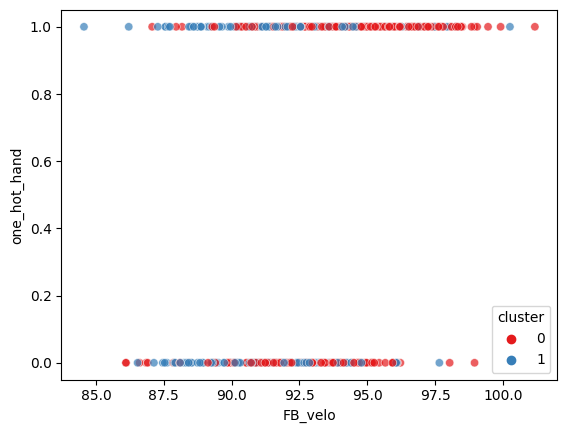

In [20]:
sns.scatterplot(data=data, y='one_hot_hand', x='FB_velo', hue='cluster', palette='Set1', alpha=0.7)

In [21]:
# Check the centroid values of each cluster
centroids = pd.DataFrame(scaler.inverse_transform(km.cluster_centers_), columns=['one_hot_hand','Var_86','Var_193','Var_108','Var_87','Var_116','Var_179'])
centroids

,one_hot_hand,Var_86,Var_193,Var_108,Var_87,Var_116,Var_179
0,0.746269,61.941103,-1.252512,1845.969618,13.488075,406.292147,0.451376
1,0.680498,53.147176,-9.550763,1480.200547,32.006825,346.139615,-11.626607


In [22]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Extracting independent and dependent variables
X = data[['one_hot_hand', 'Var_86', 'Var_193', 'Var_108', 'Var_87', 'Var_116', 'Var_179']]
y = data['FB_velo']
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.15, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate and print the performance metrics
rmse = mean_squared_error(y_test, y_pred, squared=False) # squared=False gives RMSE
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")

# If you want to check the coefficients and the intercept:
coefficients = model.coef_
intercept = model.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

Root Mean Squared Error (RMSE): 2.0667517462181997
R^2 Score: 0.16546155566342624
Coefficients: [ 0.66358268  0.24431314  0.16088201  0.3571192  -0.04568311  0.23088034
  0.08671133]
Intercept: 93.21358672988683


In [23]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Extracting independent and dependent variables
X = data[['Var_86', 'one_hot_hand', 'Var_70', 'Var_193', 'Var_19', 'Var_108', 'Var_126', 'Var_128', 'Var_125', 'Var_107', 'Var_87', 'Var_116', 'Var_179', 'Var_153', 'Var_105']]
y = data['FB_velo']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate and print the performance metrics
rmse = mean_squared_error(y_test, y_pred, squared=False) # squared=False gives RMSE
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")

# If you want to check the coefficients and the intercept:
coefficients = model.coef_
intercept = model.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

Root Mean Squared Error (RMSE): 2.0479328045564062
R^2 Score: 0.18059025052228928
Coefficients: [ 1.02291596e-01  1.60943935e+00  2.61873101e-02  3.39587736e-02
  3.42926580e-03 -3.35587854e-03  1.57017068e-02  1.21765684e-02
 -2.91791826e-02  4.95862201e-03 -6.50206949e-03  2.19536541e-03
 -2.51586263e-03  7.56517175e-02  4.96341017e-04]
Intercept: 79.60517808345911


In [24]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Extracting independent and dependent variables
X = data.iloc[:,4:-1]
y = data['FB_velo']

# Splitting the data into training and testing sets (for example, 80% train and 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate and print the performance metrics
rmse = mean_squared_error(y_test, y_pred, squared=False) # squared=False gives RMSE
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")

# If you want to check the coefficients and the intercept:
coefficients = model.coef_
intercept = model.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

Root Mean Squared Error (RMSE): 2.14880529609691
R^2 Score: 0.09873853491546092
Coefficients: [ 2.35612074e-01  2.53164477e-01  7.19457589e-01 -8.30404166e-01
 -1.93314226e+00  2.33720361e+00  7.07176502e-02 -1.47250137e-01
  8.44767426e-05 -1.27413657e-04  1.16246572e-03  3.21311956e-03
 -1.82579977e-04 -4.02698024e-03  2.34639030e+00 -4.73490381e-03
  4.73469892e-03  5.70964363e-04  2.24182436e-03 -1.79445864e-04
  3.59823348e-03 -4.48248480e-03 -1.13057955e-01  3.53497663e-02
 -7.59570040e-02  8.78969068e-01 -4.83064784e-01 -7.82596678e-01
 -1.07792472e-03 -1.24466805e+00  2.57908426e-03 -1.40218047e-05
 -7.04231833e-06 -1.45935376e-05  9.51827572e-06  1.09624581e-01
  2.42031270e-01 -5.53139632e-01  2.74622089e-01 -1.14679708e-01
 -1.48696864e-01  3.17569669e-01  3.67449331e-01  1.24798747e-01
 -2.06256675e-01 -2.67668697e-01  2.91486995e-01 -7.10548713e-02
  1.21709563e-03  4.68110182e-02 -2.59569230e+00  7.40958020e-02
 -5.71017769e-02 -3.36404091e-02 -9.68052946e-02  5.10160627e

In [25]:
data

,player_id,Height,Weight,FB_velo,Var_1,Var_2,Var_3,Var_4,Var_5,Var_6,Var_7,Var_8,Var_9,Var_10,Var_11,Var_12,Var_13,Var_14,Var_15,Var_16,Var_17,Var_18,Var_19,Var_20,Var_21,Var_22,Var_23,Var_24,Var_25,Var_26,Var_27,Var_28,Var_29,Var_30,Var_31,Var_32,Var_33,Var_34,Var_35,Var_36,Var_37,Var_38,Var_39,Var_40,Var_41,Var_42,Var_43,Var_44,Var_45,Var_46,Var_47,Var_48,Var_49,Var_50,Var_51,Var_52,Var_53,Var_54,Var_55,Var_56,Var_57,Var_58,Var_59,Var_60,Var_61,Var_62,Var_63,Var_64,Var_65,Var_66,Var_67,Var_68,Var_69,Var_70,Var_71,Var_72,Var_73,Var_74,Var_75,Var_76,Var_77,Var_78,Var_79,Var_80,Var_81,Var_82,Var_83,Var_84,Var_85,Var_86,Var_87,Var_88,Var_89,Var_90,Var_91,Var_92,Var_93,Var_94,Var_95,Var_96,Var_97,Var_98,Var_99,Var_100,Var_101,Var_102,Var_103,Var_104,Var_105,Var_106,Var_107,Var_108,Var_109,Var_110,Var_111,Var_112,Var_113,Var_114,Var_115,Var_116,Var_117,Var_118,Var_119,Var_120,Var_121,Var_122,Var_123,Var_124,Var_125,Var_126,Var_127,Var_128,Var_129,Var_130,Var_131,Var_132,Var_133,Var_134,Var_135,Var_136,Var_137,Var_138,Var_139,Var_140,Var_141,Var_142,Var_143,Var_144,Var_145,Var_146,Var_147,Var_148,Var_149,Var_150,Var_151,Var_152,Var_153,Var_154,Var_155,Var_156,Var_157,Var_158,Var_159,Var_160,Var_161,Var_162,Var_163,Var_164,Var_165,Var_166,Var_167,Var_168,Var_169,Var_170,Var_171,Var_172,Var_173,Var_174,Var_175,Var_176,Var_177,Var_178,Var_179,Var_180,Var_181,Var_182,Var_183,Var_184,Var_185,Var_186,Var_187,Var_188,Var_189,Var_190,Var_191,Var_192,Var_193,Var_194,Var_195,Var_196,Var_197,Var_198,Var_199,Var_200,Var_201,Var_202,Var_203,Var_204,Var_205,Var_206,Var_207,Var_208,Var_209,Var_210,Var_211,Var_212,Var_213,Var_217,Var_218,Var_219,Var_220,Var_221,Var_222,Var_223,Var_224,Var_225,Var_226,Var_227,Var_228,one_hot_hand,cluster
0,476,79,230,86.21085,60.661279,59.391315,44.422491,43.642518,22.716024,22.590960,22.236456,12.327304,500.520230,421.789810,-778.166373,-316.852073,330.576478,242.101478,1.751398,147.572605,645.511408,945.267424,460.532827,1035.797349,2074.785645,162.279126,14.846736,42.376543,36.004777,-0.888073,-15.053821,0.047429,586.215671,1.467175,120.300025,11632.624100,35428.93574,14995.36676,40480.17274,66.969664,56.922076,60.739147,76.884996,6.446433,11.966312,5.359619,5.155577,8.636484,4.951887,1.659009,0.733615,43.888474,46.159233,52.942273,1.634485,12.519142,23.093486,-5.718471,5.500318,4.535490,-5.332912,-11.609253,-12.792667,-16.175274,23.241624,15.476942,-36.859117,-35.987569,105.182674,41.199354,56.652354,46.692439,36.318296,14.695547,1.506293,0.524191,1.610962,0.754269,1331.449224,1100.875886,15.179326,17.188669,35.585012,47.816888,19.746672,56.780269,29.272531,49.683026,-4.485455,59.363906,31.589261,2.230977,10.540076,46.972611,-78.354641,-45.862239,-17.637890,-55.875513,278.575298,1980.185688,-466.679098,403.353782,2005.632650,224.246940,-369.780011,-104.812195,-623.566449,2084.732170,885.120195,288.400997,1631.694924,1808.513998,-234.820188,-53.284629,344.811391,577.904238,462.331293,407.897296,241.759978,386.888376,216.262156,410.260346,404.726842,432.001767,415.239913,306.306827,244.268018,146.992720,566.007949,435.180573,305.186206,807.065889,1010.292873,550.881049,3.657112,5.631948,4.420208,33.102897,53.518825,33.790780,37.639978,29.619551,40.915034,28.853853,-26.118194,-13.825067,14.302420,71.757755,79.679538,-24.648782,-23.349091,-21.712183,72.542444,95.118217,6.337961,18.542877,13.804240,24.451028,39.674214,14.406819,15.491990,-2.659718,35.671500,46.970272,9.785449,40.172979,6.612948,-3.453255,22.178049,5.322597,1.827847,-7.980538,-2.381771,60.263093,26.638996,18.874495,144.989743,119.061759,100.314130,37.094541,-14.283921,16.206174,-11.558211,108.131372,110.097034,123.118532,-9.317913,3.156590,0.899528,87.325864,43.119841,36.047442,-14.030257,-6.078395,-1.386496,-1.803744,-5.697972,9.382460,0.273131,4.977475,16.220677,18.508185,1.049638,60.005022,4.512041,0.706773,59.710144,4.737142,0.627715,58.702313,3.891563,0.682492,57.551135,3.601702,0.743923,56.345664,3.379597,59.889753,0.523182,0.243799,0.324076,0.

In [26]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Separate the predictors and target
X = data.drop(['player_id','Height','Weight', 'FB_velo','cluster'], axis=1)
y = data['FB_velo']

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying Lasso regression
lasso = Lasso(alpha=0.3)
lasso.fit(X_scaled, y)

# Getting significant features
significant_features = X.columns[lasso.coef_ != 0]
significant_features

Index(['Var_7', 'Var_38', 'Var_59', 'Var_70', 'Var_86', 'Var_101', 'Var_107',
       'Var_116', 'Var_126', 'Var_148', 'Var_181', 'Var_223', 'Var_225',
       'one_hot_hand'],
      dtype='object')

In [27]:
# Extracting independent and dependent variables
lasso_data = data[['Var_7', 'Var_38', 'Var_59', 'Var_70', 'Var_86', 'Var_101', 'Var_107',
       'Var_116', 'Var_126', 'Var_148', 'Var_181', 'Var_223', 'Var_225',
       'one_hot_hand','FB_velo']]
X = lasso_data[['Var_7', 'Var_38', 'Var_59', 'Var_86', 'Var_101', 'Var_107',
       'Var_116', 'Var_126', 'Var_148', 'Var_181', 'Var_223', 'Var_225',
       'one_hot_hand']]
y = data['FB_velo']
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.15, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate and print the performance metrics
rmse = mean_squared_error(y_test, y_pred, squared=False) # squared=False gives RMSE
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")

# If you want to check the coefficients and the intercept:
coefficients = model.coef_
intercept = model.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

Root Mean Squared Error (RMSE): 1.8104436309400362
R^2 Score: 0.3596170856889648
Coefficients: [ 0.26343337  0.25149917 -0.37079641  0.61814973  0.28147051  0.53940713
 -0.07421185 -0.19738778 -0.29888007 -0.5081431   0.3286959   0.16796319
  0.56688397]
Intercept: 93.19477757571083


In [28]:
high_corr_pairs(lasso_data,0.7)

[('Var_86', 'Var_70', 0.8512561098888998)]

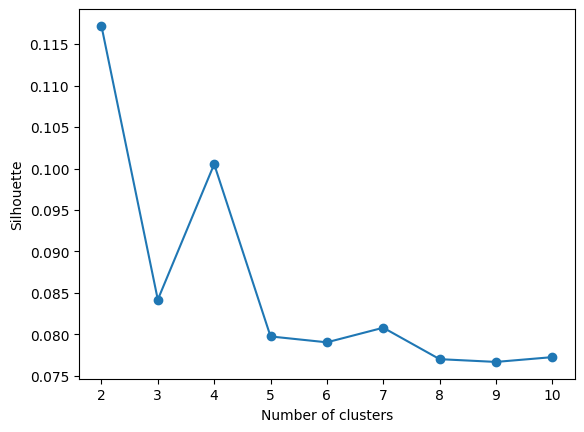

In [29]:
scaler = StandardScaler()
X = lasso_data[['Var_7', 'Var_38', 'Var_59', 'Var_86', 'Var_101', 'Var_107',
       'Var_116', 'Var_126', 'Var_148', 'Var_181', 'Var_223', 'Var_225',
       'one_hot_hand']]
X_scaled = scaler.fit_transform(X)

# Elbow method to determine optimal K
distortions = []
sil = []
for i in range(2, 11):
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X_scaled)
    labels = km.labels_
    sil.append(silhouette_score(X_scaled, labels, metric = 'euclidean'))
    distortions.append(km.inertia_)

plt.plot(range(2, 11), sil, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette')
plt.show()

km = KMeans(n_clusters=2, random_state=0)
lasso_data['cluster'] = km.fit_predict(X_scaled)

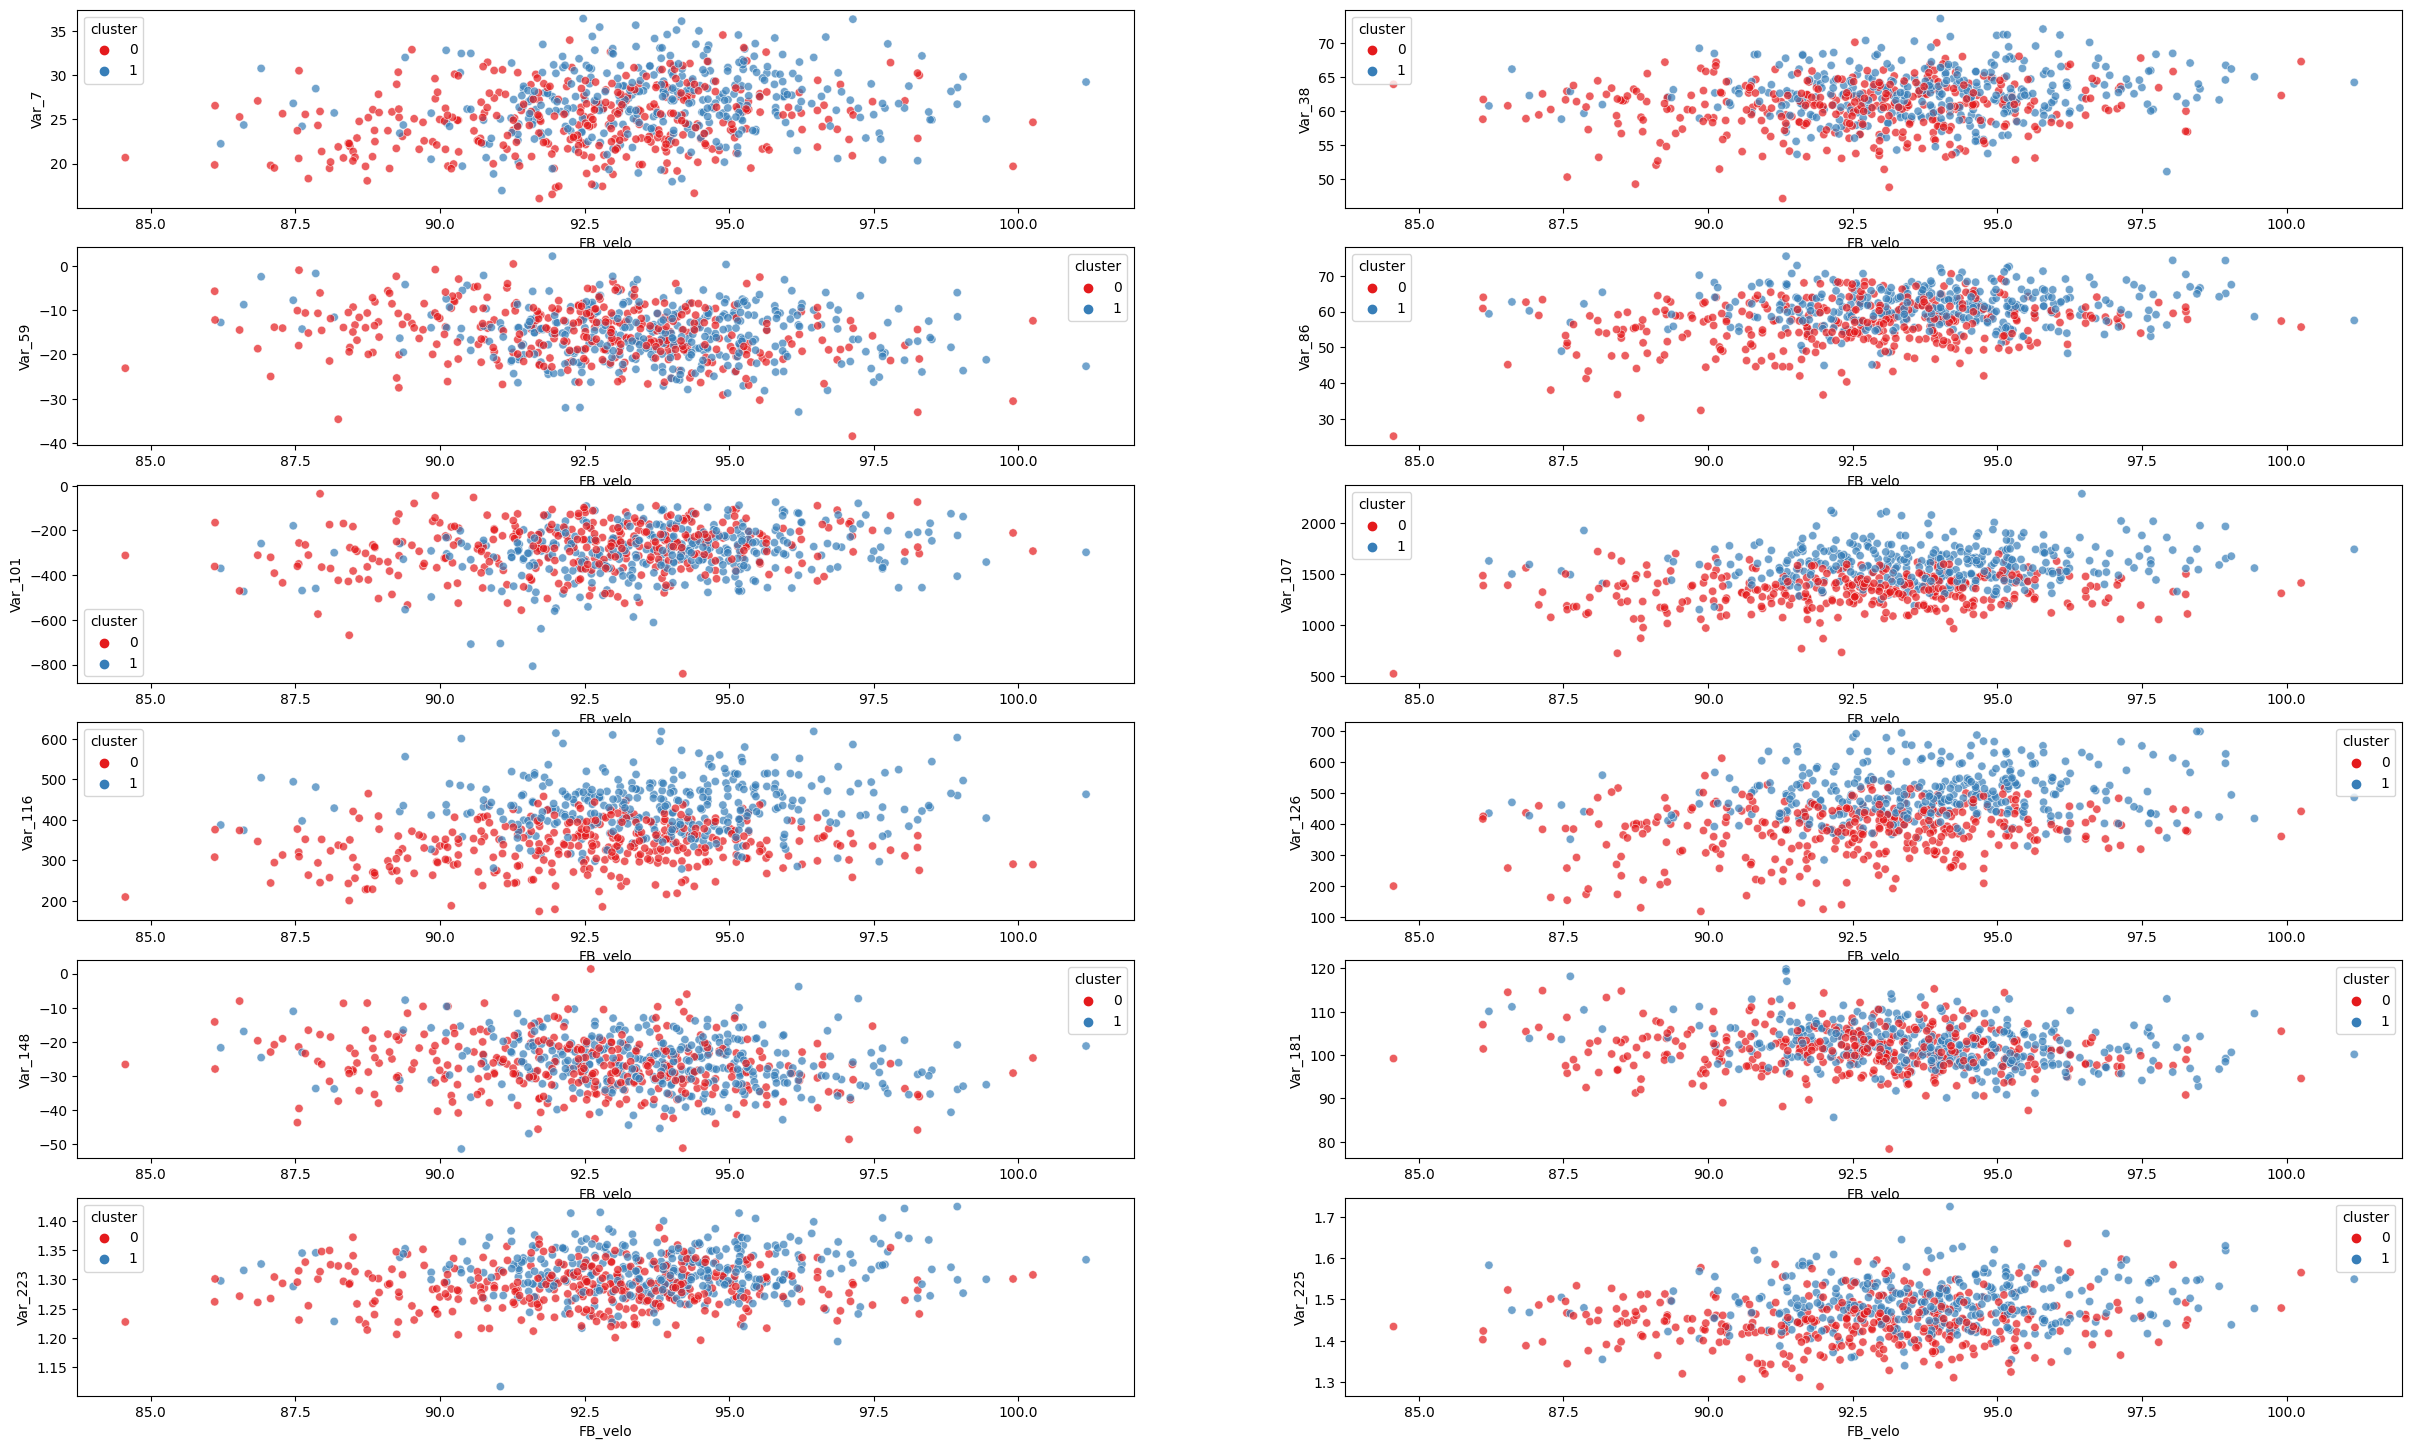

In [30]:
fig_lasso_cluster, ax_lasso_cluster = plt.subplots(6,2, figsize=(30, 18))
sns.scatterplot(data=lasso_data, y='Var_7', x='FB_velo', hue='cluster', palette='Set1', alpha=0.7, ax=ax_lasso_cluster[0][0])
sns.scatterplot(data=lasso_data, y='Var_38', x='FB_velo', hue='cluster', palette='Set1', alpha=0.7, ax=ax_lasso_cluster[0][1])
sns.scatterplot(data=lasso_data, y='Var_59', x='FB_velo', hue='cluster', palette='Set1', alpha=0.7, ax=ax_lasso_cluster[1][0])
sns.scatterplot(data=lasso_data, y='Var_86', x='FB_velo', hue='cluster', palette='Set1', alpha=0.7, ax=ax_lasso_cluster[1][1])
sns.scatterplot(data=lasso_data, y='Var_101', x='FB_velo', hue='cluster', palette='Set1', alpha=0.7, ax=ax_lasso_cluster[2][0])
sns.scatterplot(data=lasso_data, y='Var_107', x='FB_velo', hue='cluster', palette='Set1', alpha=0.7, ax=ax_lasso_cluster[2][1])
sns.scatterplot(data=lasso_data, y='Var_116', x='FB_velo', hue='cluster', palette='Set1', alpha=0.7, ax=ax_lasso_cluster[3][0])
sns.scatterplot(data=lasso_data, y='Var_126', x='FB_velo', hue='cluster', palette='Set1', alpha=0.7, ax=ax_lasso_cluster[3][1])
sns.scatterplot(data=lasso_data, y='Var_148', x='FB_velo', hue='cluster', palette='Set1', alpha=0.7, ax=ax_lasso_cluster[4][0])
sns.scatterplot(data=lasso_data, y='Var_181', x='FB_velo', hue='cluster', palette='Set1', alpha=0.7, ax=ax_lasso_cluster[4][1])
sns.scatterplot(data=lasso_data, y='Var_223', x='FB_velo', hue='cluster', palette='Set1', alpha=0.7, ax=ax_lasso_cluster[5][0])
sns.scatterplot(data=lasso_data, y='Var_225', x='FB_velo', hue='cluster', palette='Set1', alpha=0.7, ax=ax_lasso_cluster[5][1])
plt.show()